In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

In [2]:
path_to_data = Path.cwd() / "resources" / "other_datasets_lesions_info.csv"
min_voxels = 50
min_slices = 2

In [3]:
df = pd.read_csv(path_to_data)

In [4]:
# Add column to identify the image
df["image"] = df.apply(
    lambda row: f"{'-'.join([row['dataset'], row['patient'], row['study'], row['filename']])}",
    axis=1
)

In [5]:
# Remove lesions smaller than 50 voxels or with 1 slice
df = df[
    (df["voxels_count"] >= min_voxels) |
    (df["slices_count"] >= min_slices)
].copy()

In [12]:
# Total annotated lesions
grouped = df.groupby('dataset').size().reset_index(name='lesions_count')
display(grouped.sort_values(by='lesions_count'))

,dataset,lesions_count
0,Adrenal-ACC-Ki67,54
10,Task06_Lung,70
4,KiPA22,72
13,Task10_Colon,130
3,HCC-TACE-Seg,145
7,NSCLC-Radiogenomics,156
2,GLIS-RT,250
11,Task07_Pancreas,283
12,Task08_HepaticVessel,532
6,LNQ23,556


In [7]:
# Total annotated volume
grouped = df.groupby('dataset')[['volume_mm3', 'volume_ml']].sum()
display(grouped)

,volume_mm3,volume_ml
dataset,,
Adrenal-ACC-Ki67,2.815078e+07,28150.777203
CT-Lymph-Nodes,4.912883e+06,4912.883119
GLIS-RT,3.259464e+07,32594.640646
HCC-TACE-Seg,4.002449e+07,40024.492483
KiPA22,2.852676e+06,2852.675798
KiTS23,6.454911e+07,64549.105090
LNQ23,5.117820e+06,5117.819827
NSCLC-Radiogenomics,3.905487e+06,3905.486775
PET-CT,1.100855e+08,110085.477634


In [8]:
# Volumes with annotated lesions
grouped = df.groupby(['dataset'])['image'].nunique().reset_index(name='annotated_volumes')
display(grouped)

,dataset,annotated_volumes
0,Adrenal-ACC-Ki67,53
1,CT-Lymph-Nodes,1031
2,GLIS-RT,229
3,HCC-TACE-Seg,105
4,KiPA22,70
5,KiTS23,489
6,LNQ23,393
7,NSCLC-Radiogenomics,144
8,PET-CT,501
9,Task03_Liver,118


In [9]:
# Statistics of annotated lesions
grouped = df.groupby('dataset')['volume_ml'].describe()
display(grouped)

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
Adrenal-ACC-Ki67,54.0,521.310689,1123.448462,0.584412,54.587495,177.445068,549.581985,7863.760712
CT-Lymph-Nodes,1031.0,4.765163,10.698951,0.019996,1.100525,2.340375,4.763207,209.709473
GLIS-RT,250.0,130.378563,91.379041,0.464349,56.726751,121.228342,188.197556,473.378970
HCC-TACE-Seg,145.0,276.030983,569.153760,0.066742,8.989014,43.507113,245.304955,4054.628325
KiPA22,72.0,39.620497,47.833205,1.941254,10.800999,26.058104,49.480939,263.874677
KiTS23,602.0,107.224427,245.738676,0.001308,4.774009,18.324243,71.527078,2590.918263
LNQ23,556.0,9.204712,14.236217,0.175033,2.695823,4.936073,9.195729,130.355240
NSCLC-Radiogenomics,156.0,25.035172,53.826520,0.003815,2.555422,6.605518,22.184753,371.856445
PET-CT,7141.0,15.415975,77.274389,0.024882,0.559846,1.542687,4.615619,2144.682651


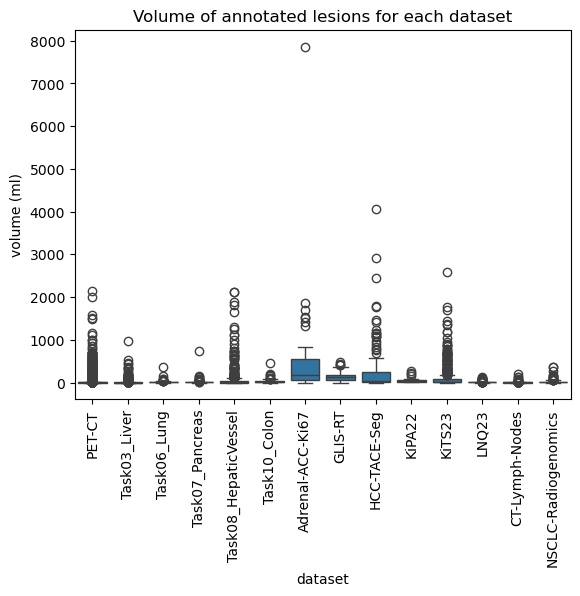

In [10]:
# Boxplots of lesion volumes
sns.boxplot(x="dataset", y="volume_ml", data=df)
plt.title("Volume of annotated lesions for each dataset")
plt.xticks(rotation=90)
plt.ylabel("volume (ml)")
plt.show()

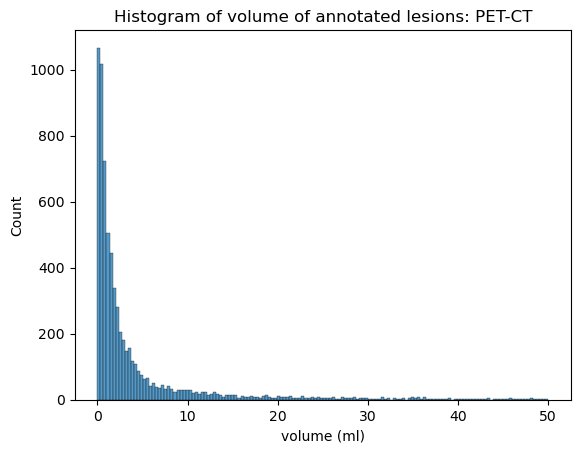

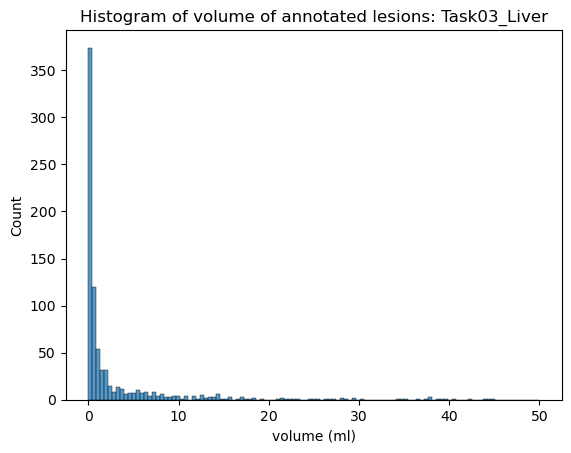

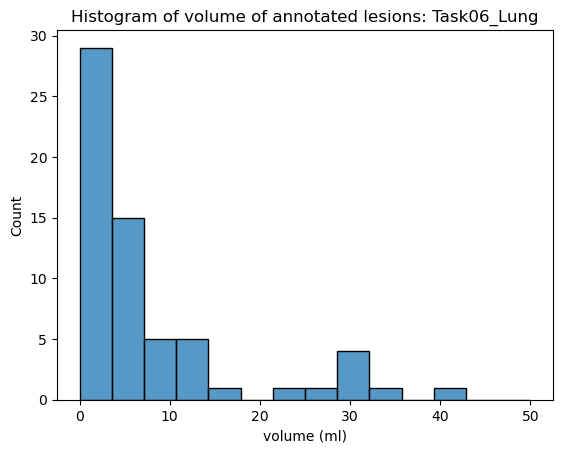

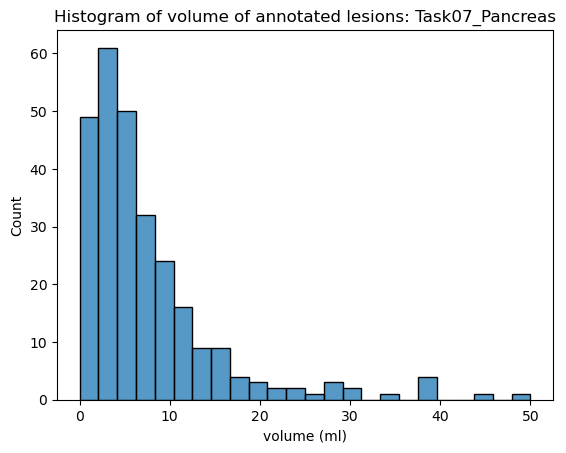

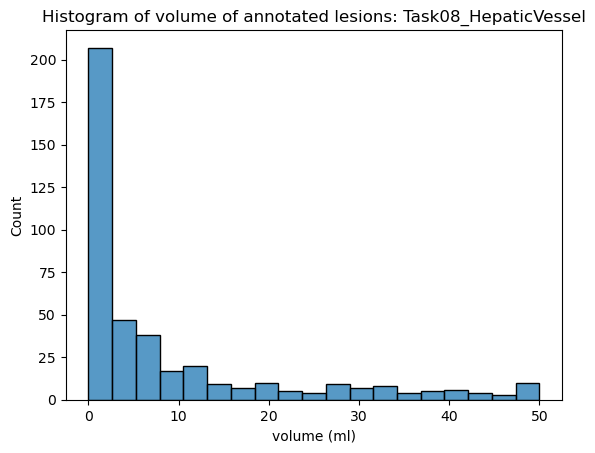

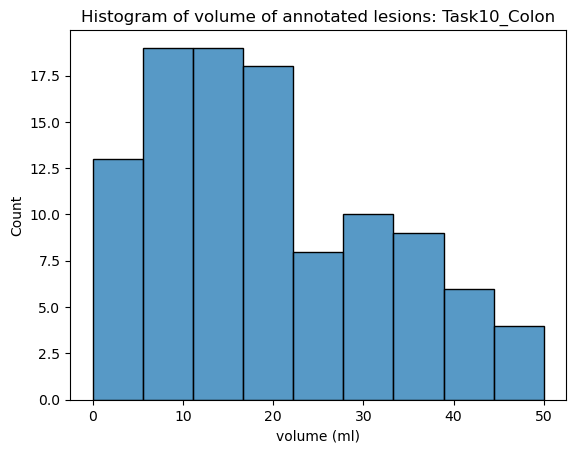

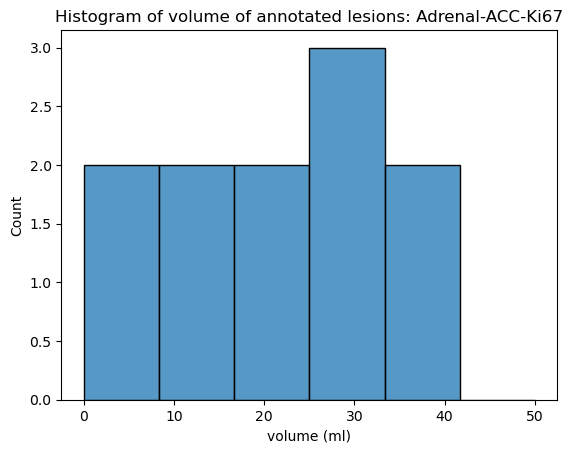

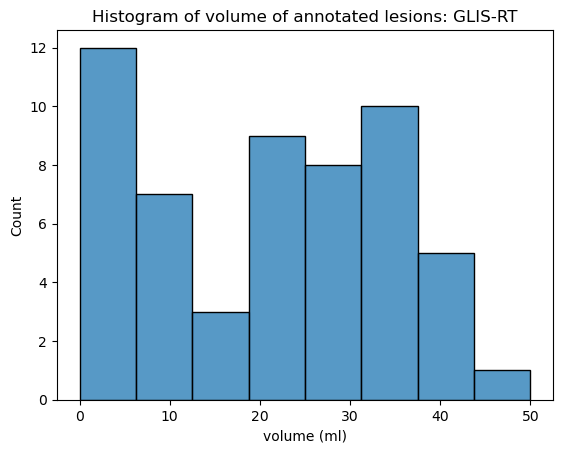

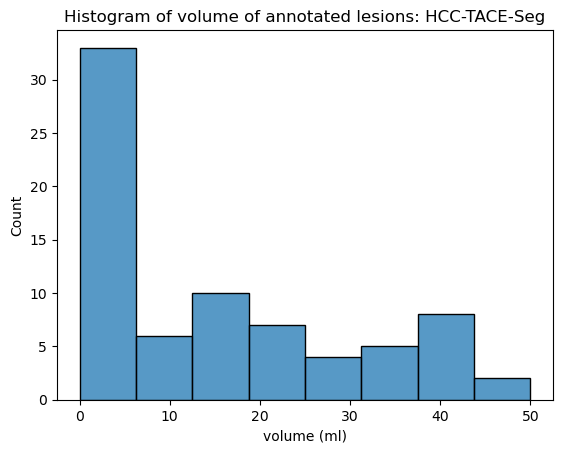

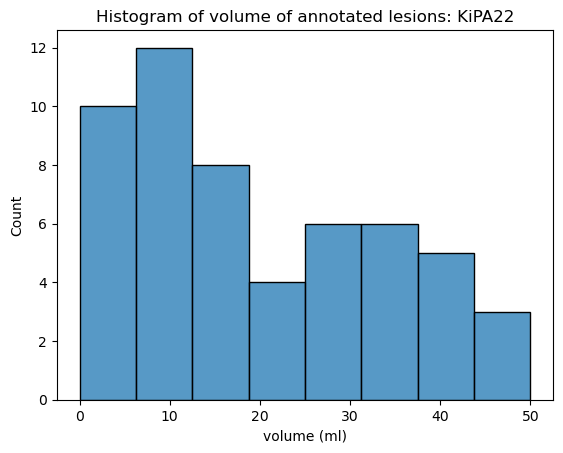

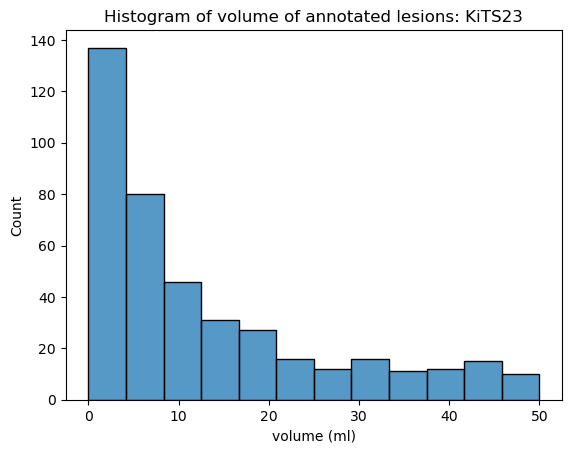

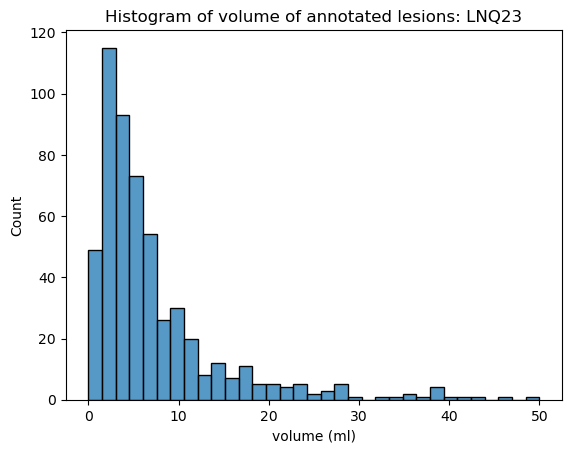

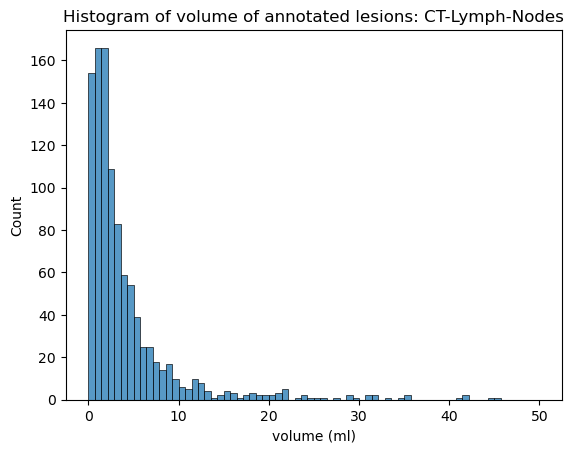

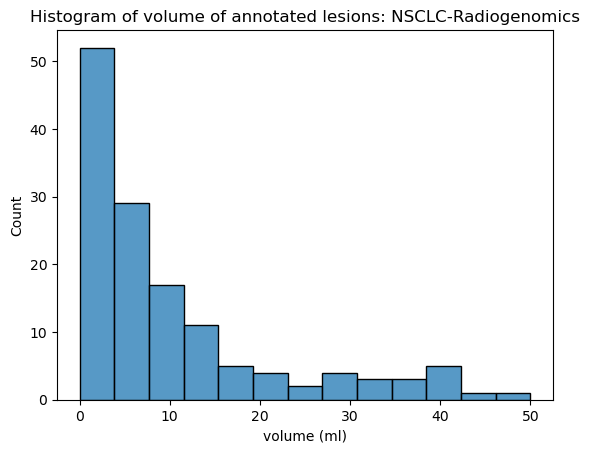

In [11]:
# Histograms of annotated lesions
warnings.filterwarnings("ignore", "use_inf_as_na")
for dataset in df['dataset'].unique().tolist():
    sns.histplot(
        df[df["dataset"] == dataset]["volume_ml"],
        binrange=(0,50)
    )
    plt.xlabel("volume (ml)")
    plt.title(f"Histogram of volume of annotated lesions: {dataset}")
    plt.show()